# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | saudarkrokur
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | alotau
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | yemetsk
Processing Record 18 of Set 1 | coracora
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of

Processing Record 41 of Set 4 | wailua homesteads
Processing Record 42 of Set 4 | egilsstadir
Processing Record 43 of Set 4 | toliara
Processing Record 44 of Set 4 | brokopondo
Processing Record 45 of Set 4 | lazaro cardenas
Processing Record 46 of Set 4 | crescent city
Processing Record 47 of Set 4 | tchintabaraden
Processing Record 48 of Set 4 | bull savanna
Processing Record 49 of Set 4 | labytnangi
Processing Record 0 of Set 5 | kizhinga
Processing Record 1 of Set 5 | kailua-kona
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | shingu
Processing Record 4 of Set 5 | choyr
Processing Record 5 of Set 5 | birjand
Processing Record 6 of Set 5 | tenenkou
Processing Record 7 of Set 5 | almansa
Processing Record 8 of Set 5 | kawerau
Processing Record 9 of Set 5 | hawaiian paradise park
Processing Record 10 of Set 5 | polyarnyy
Processing Record 11 of Set 5 | beau vallon
Processing Record 12 of Set 5 | princeville
Processing Record 13 of Set 5 | sur
Processing Record 1

Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | novodvinsk
Processing Record 34 of Set 8 | turpan
Processing Record 35 of Set 8 | el calafate
Processing Record 36 of Set 8 | umea
Processing Record 37 of Set 8 | xilin hot
Processing Record 38 of Set 8 | kimbe
Processing Record 39 of Set 8 | adigrat
Processing Record 40 of Set 8 | tres palos
Processing Record 41 of Set 8 | labuan
Processing Record 42 of Set 8 | hurricane
Processing Record 43 of Set 8 | suva
Processing Record 44 of Set 8 | pitimbu
Processing Record 45 of Set 8 | cova figueira
Processing Record 46 of Set 8 | kemijarvi
Processing Record 47 of Set 8 | himimachi
Processing Record 48 of Set 8 | priargunsk
Processing Record 49 of Set 8 | nykvarn
Processing Record 0 of Set 9 | mugia
Processing Record 1 of Set 9 | limassol
Processing Record 2 of Set 9 | marka
Processing Record 3 of Set 9 | newport
Processing Record 4 of Set 9 | carutapera
Processing Record 5 of Set 9 | baytown
Processing Record 6 of Set 

Processing Record 22 of Set 12 | nizhniy odes
Processing Record 23 of Set 12 | songea
Processing Record 24 of Set 12 | urangan
Processing Record 25 of Set 12 | sheridan
Processing Record 26 of Set 12 | vytegra
Processing Record 27 of Set 12 | cardano al campo
Processing Record 28 of Set 12 | eten
Processing Record 29 of Set 12 | ardakan
Processing Record 30 of Set 12 | taltal
Processing Record 31 of Set 12 | alaghsas
Processing Record 32 of Set 12 | tarauaca
Processing Record 33 of Set 12 | norfolk
Processing Record 34 of Set 12 | kalmunai
Processing Record 35 of Set 12 | kemin
Processing Record 36 of Set 12 | mounana
Processing Record 37 of Set 12 | kasongo
Processing Record 38 of Set 12 | mahaddayweyne
Processing Record 39 of Set 12 | deoli
Processing Record 40 of Set 12 | howard springs
Processing Record 41 of Set 12 | outjo
Processing Record 42 of Set 12 | gamba
Processing Record 43 of Set 12 | kasane
Processing Record 44 of Set 12 | ewo
Processing Record 45 of Set 12 | salekhard
P

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,14.48,82,20,3.09,GB,1693253478
1,saudarkrokur,65.7461,-19.6394,9.02,94,79,3.02,IS,1693253479
2,hamilton,39.1834,-84.5333,28.61,50,20,3.60,US,1693253479
3,grytviken,-54.2811,-36.5092,-3.65,80,100,2.33,GS,1693253480
4,port-aux-francais,-49.3500,70.2167,3.26,79,82,17.53,TF,1693253480


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,14.48,82,20,3.09,GB,1693253478
1,saudarkrokur,65.7461,-19.6394,9.02,94,79,3.02,IS,1693253479
2,hamilton,39.1834,-84.5333,28.61,50,20,3.60,US,1693253479
3,grytviken,-54.2811,-36.5092,-3.65,80,100,2.33,GS,1693253480
4,port-aux-francais,-49.3500,70.2167,3.26,79,82,17.53,TF,1693253480


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

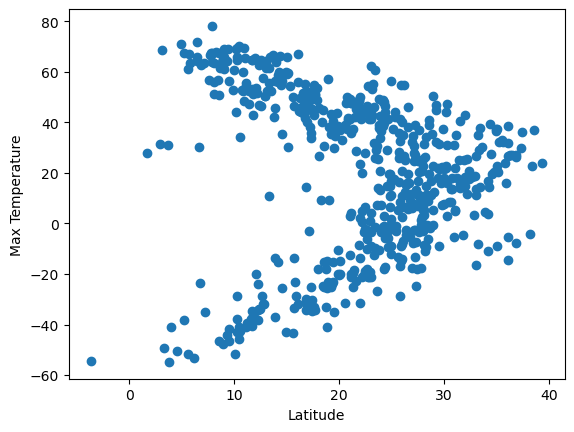

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

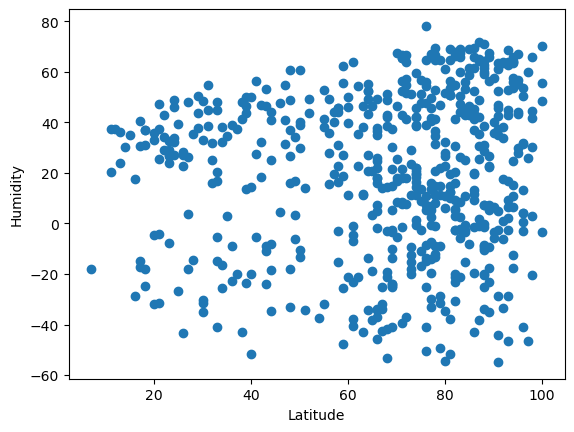

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

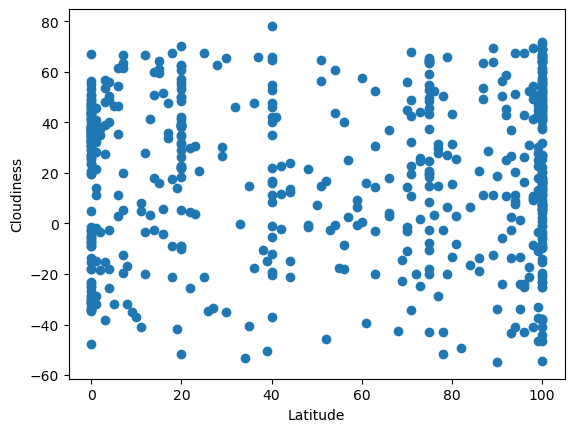

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

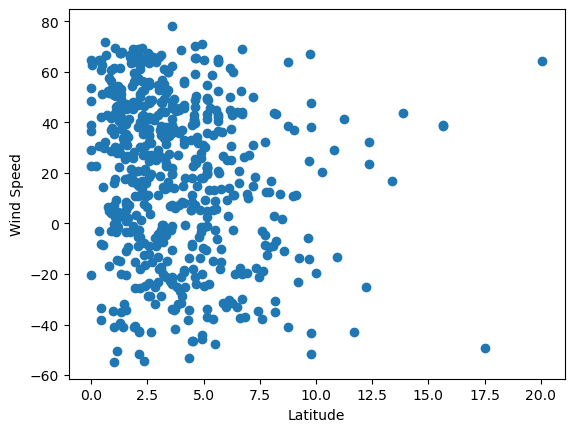

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,14.48,82,20,3.09,GB,1693253478
1,saudarkrokur,65.7461,-19.6394,9.02,94,79,3.02,IS,1693253479
2,hamilton,39.1834,-84.5333,28.61,50,20,3.60,US,1693253479
10,iqaluit,63.7506,-68.5145,7.85,61,75,5.66,CA,1693253483
12,enewetak,11.3474,162.3373,28.73,78,89,9.11,MH,1693253484


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,-3.65,80,100,2.33,GS,1693253480
4,port-aux-francais,-49.3500,70.2167,3.26,79,82,17.53,TF,1693253480
5,puerto ayora,-0.7393,-90.3518,28.98,84,48,3.13,EC,1693253481
6,namibe,-15.1961,12.1522,19.41,84,100,2.71,AO,1693253481
7,waitangi,-43.9535,-176.5597,9.34,91,100,4.92,NZ,1693253482


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.31x + 33.16
The r-value is: -0.6979030359969942


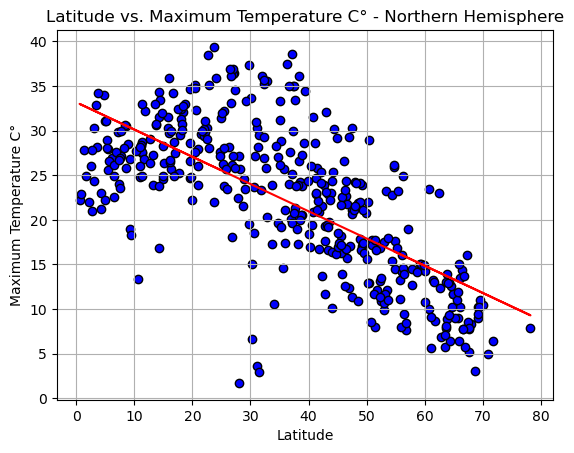

In [19]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.43x + 29.12
The r-value is: 0.8274834452138446


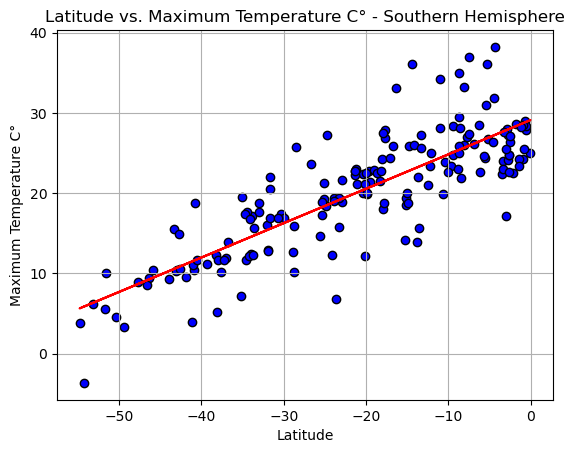

In [20]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.11x + 63.98
The r-value is: 0.09239272604260976


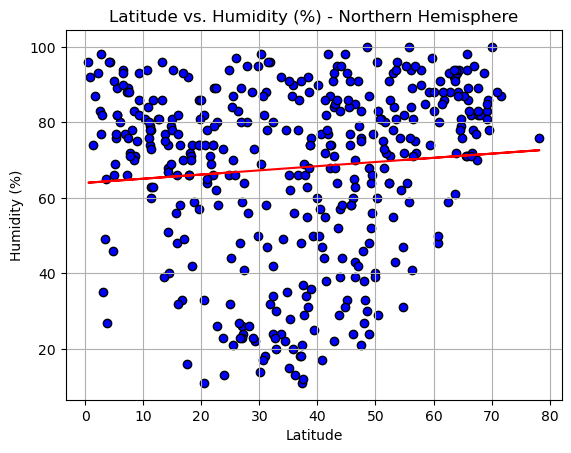

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.1x + 68.51
The r-value is: 0.06868748223596864


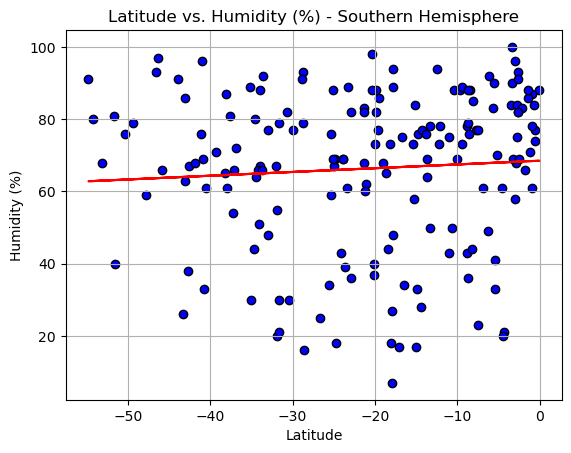

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = -0.1x + 56.47
The r-value is: -0.04681593543610962


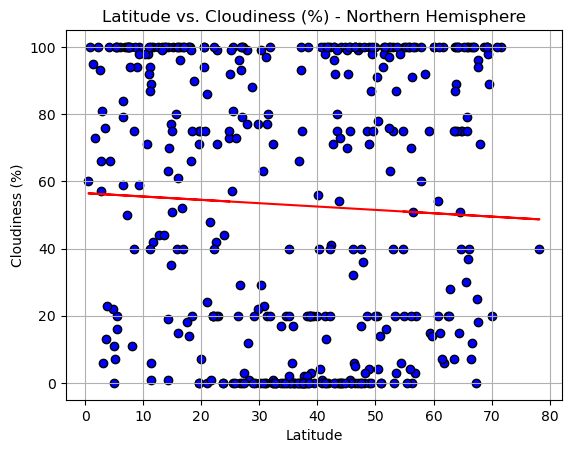

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.14x + 46.15
The r-value is: -0.05238351416649479


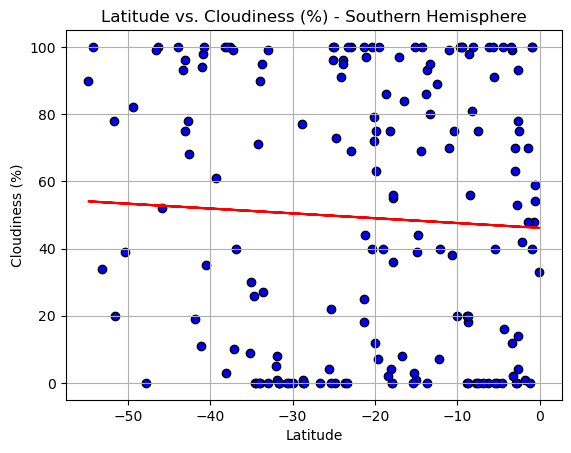

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.02x + 4.11
The r-value is: -0.10976816148172568


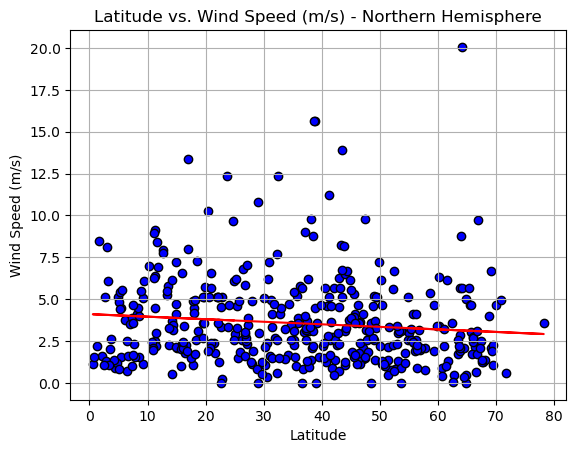

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.02x + 3.76
The r-value is: -0.12463442078152248


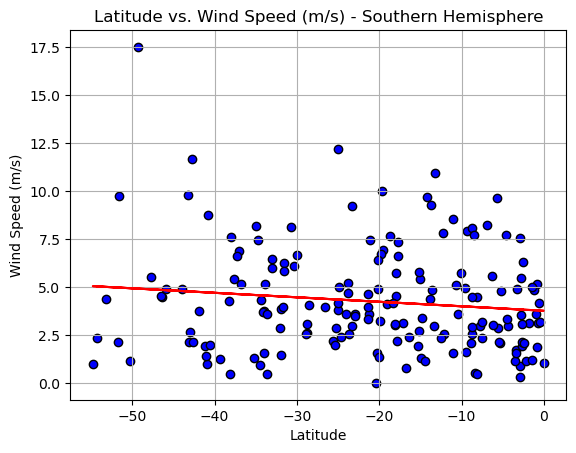

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE